In [1]:
import glob
import json
import os
import pickle
import pprint
import sys
from datetime import datetime

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

module_path = os.path.abspath(os.path.join("../../.."))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.config import PATH_MODELS, PATH_REPORTS  # noqa: E402

In [2]:
corpus_name = "depression"
corpus_kind = "reddit"

In [3]:
def get_model_information(file_path):
    with open(file_path) as f:
        model_information = json.load(fp=f)
    return model_information


def get_model_report(file_path):
    with open(file_path, "rb") as f:
        (
            classifier,
            classification_report,
            precision,
            recall,
            f1,
            accuracy,
            confusion_matrix,
            elapsed_mins,
            elapsed_secs,
        ) = pickle.load(f)
    output_dictionary = {
        "classification_report": classification_report,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "accuracy": accuracy,
        "confusion_matrix": confusion_matrix,
        "elapsed_mins": elapsed_mins,
        "elapsed_secs": elapsed_secs,
    }
    return output_dictionary

In [4]:
representations_list = [
    "bow",
    "lda",
    "lsa",
    "doc2vec",
    "padded_sequential",
    "bert_tokenizer",
]

model_identifier = 0

# Dictionary used to create the dataframe with columns, but no rows.
base_dictionary = {
    "model_identifier": [],
    "corpus_kind": [],
    "corpus_name": [],
    "representation": [],
    "representation_information": [],
    "train_file_path": [],
    "random_seed": [],
    "classifier_type": [],
    "classifier_params": [],
    "classification_report": [],
    "precision": [],
    "recall": [],
    "f1": [],
    "accuracy": [],
    "confusion_matrix": [],
    "elapsed_mins": [],
    "elapsed_secs": [],
    "total_secs": [],
    "file_name": [],
}
result_comparison = pd.DataFrame(base_dictionary)

for representation in representations_list:
    base_path = os.path.join(PATH_MODELS, corpus_kind, corpus_name, representation)
    possible_json_files = glob.glob(f"{base_path}/*_model_information.json")
    for json_file in possible_json_files:
        pkl_file = json_file[:-16] + "and_report.pkl"

        model_information = get_model_information(json_file)
        output_dictionary = get_model_report(pkl_file)
        file_name = os.path.splitext(os.path.basename(json_file))[0]

        total_secs = (
            output_dictionary["elapsed_mins"] * 60 + output_dictionary["elapsed_secs"]
        )

        df_row = {
            "model_identifier": model_identifier,
            "file_name": file_name,
            "total_secs": total_secs,
        }
        df_row.update(model_information)
        df_row.update(output_dictionary)

        result_comparison = result_comparison.append(df_row, ignore_index=True)

        model_identifier += 1

In [5]:
result_comparison

,model_identifier,corpus_kind,corpus_name,representation,representation_information,train_file_path,random_seed,classifier_type,classifier_params,classification_report,precision,recall,f1,accuracy,confusion_matrix,elapsed_mins,elapsed_secs,total_secs,file_name
0,0.0,reddit,depression,bow,{'CountVectorizer_params': {'analyzer': 'word'...,/home2/loyola/tmp/unsl_erisk_2022/data/process...,30.0,SVC,"{'C': 128, 'break_ties': False, 'cache_size': ...",precision recall f1-score ...,0.878604,0.851069,0.857950,0.864407,"[[604, 29], [123, 365]]",1.0,21.0,81.0,4792_model_information
1,1.0,reddit,depression,bow,{'CountVectorizer_params': {'analyzer': 'char_...,/home2/loyola/tmp/unsl_erisk_2022/data/process...,30.0,SVC,"{'C': 0.5, 'break_ties': False, 'cache_size': ...",precision recall f1-score ...,0.914305,0.915424,0.914837,0.916146,"[[583, 50], [44, 444]]",0.0,47.0,47.0,2504_model_information
2,2.0,reddit,depression,bow,{'CountVectorizer_params': {'analyzer': 'char_...,/home2/loyola/tmp/unsl_erisk_2022/data/process...,30.0,SVC,"{'C': 32, 'break_ties': False, 'cache_size': 2...",precision recall f1-score ...,0.282337,0.500000,0.360889,0.564674,"[[633, 0], [488, 0]]",0.0,0.0,0.0,2778_model_information
3,3.0,reddit,depression,bow,{'CountVectorizer_params': {'analyzer': 'word'...,/home2/loyola/tmp/unsl_erisk_2022/data/process...,30.0,SVC,"{'C': 0.5, 'break_ties': False, 'cache_size': ...",precision recall f1-score ...,0.914560,0.918326,0.916044,0.917038,"[[575, 58], [35, 453]]",0.0,11.0,11.0,2949_model_information
4,4.0,reddit,depression,bow,{'CountVectorizer_params': {'analyzer': 'char_...,/home2/loyola/tmp/unsl_erisk_2022/data/process...,30.0,SVC,"{'C': 128, 'break_ties': False, 'cache_size': ...",precision recall f1-score ...,0.564469,0.540653,0.511986,0.579839,"[[534, 99], [372, 116]]",0.0,0.0,0.0,1699_model_information
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8642,8642.0,reddit,depression,bert_tokenizer,PreTrainedTokenizer(name_or_path='roberta-base...,/home2/loyola/tmp/unsl_erisk_2022/data/interim...,30.0,BERT,{'model_architecture': 'BERT( (encoder): Rob...,precision recall f1-score ...,0.282337,0.500000,0.360889,0.564674,"[[633, 0], [488, 0]]",12.0,50.0,770.0,14_model_information
8643,8643.0,reddit,depression,bert_tokenizer,PreTrainedTokenizer(name_or_path='bert-base-un...,/home2/loyola/tmp/unsl_erisk_2022/data/interim...,30.0,BERT,{'model_architecture': 'BERT( (encoder): Ber...,precision recall f1-score ...,0.876818,0.882718,0.877839,0.878680,"[[539, 94], [42, 446]]",13.0,19.0,799.0,08_model_information
8644,8644.0,reddit,depression,bert_tokenizer,PreTrainedTokenizer(name_or_path='roberta-base...,/home2/loyola/tmp/unsl_erisk_2022/data/interim...,30.0,BERT,{'model_architecture': 'BERT( (encoder): Rob...,precision recall f1-score ...,0.885145,0.890382,0.886606,0.887600,"[[550, 83], [43, 445]]",15.0,45.0,945.0,21_model_information
8645,8645.0,reddit,depression,bert_tokenizer,PreTrainedTokenizer(name_or_path='bert-base-un...,/home2/loyola/tmp/unsl_erisk_2022/data/interim...,30.0,BERT,{'model_architecture': 'BERT( (encoder): Ber...,precision recall f1-score ...,0.762889,0.570056,0.503076,0.624442,"[[627, 6], [415, 73]]",15.0,37.0,937.0,11_model_information


In [6]:
result_comparison.sort_values("f1", ascending=False)

,model_identifier,corpus_kind,corpus_name,representation,representation_information,train_file_path,random_seed,classifier_type,classifier_params,classification_report,precision,recall,f1,accuracy,confusion_matrix,elapsed_mins,elapsed_secs,total_secs,file_name
4351,4351.0,reddit,depression,bow,{'CountVectorizer_params': {'analyzer': 'word'...,/home2/loyola/tmp/unsl_erisk_2022/data/process...,30.0,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",precision recall f1-score ...,0.933238,0.934593,0.933878,0.934880,"[[593, 40], [33, 455]]",0.0,1.0,1.0,3087_model_information
2236,2236.0,reddit,depression,bow,{'CountVectorizer_params': {'analyzer': 'word'...,/home2/loyola/tmp/unsl_erisk_2022/data/process...,30.0,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",precision recall f1-score ...,0.932269,0.933803,0.932987,0.933988,"[[592, 41], [33, 455]]",0.0,2.0,2.0,3091_model_information
3654,3654.0,reddit,depression,bow,{'CountVectorizer_params': {'analyzer': 'word'...,/home2/loyola/tmp/unsl_erisk_2022/data/process...,30.0,LogisticRegression,"{'C': 8, 'class_weight': None, 'dual': False, ...",precision recall f1-score ...,0.932544,0.933334,0.932926,0.933988,"[[594, 39], [35, 453]]",0.0,0.0,0.0,4617_model_information
640,640.0,reddit,depression,bow,{'CountVectorizer_params': {'analyzer': 'word'...,/home2/loyola/tmp/unsl_erisk_2022/data/process...,30.0,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",precision recall f1-score ...,0.932698,0.933099,0.932896,0.933988,"[[595, 38], [36, 452]]",0.0,2.0,2.0,4640_model_information
2264,2264.0,reddit,depression,bow,{'CountVectorizer_params': {'analyzer': 'char_...,/home2/loyola/tmp/unsl_erisk_2022/data/process...,30.0,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",precision recall f1-score ...,0.933042,0.932630,0.932833,0.933988,"[[597, 36], [38, 450]]",0.0,3.0,3.0,0218_model_information
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8098,8098.0,reddit,depression,doc2vec,"{'dm': 0, 'vector_size': 300, 'window': 15, 's...",/home2/loyola/tmp/unsl_erisk_2022/data/process...,30.0,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",precision recall f1-score ...,0.718247,0.502370,0.308578,0.438002,"[[3, 630], [0, 488]]",0.0,0.0,0.0,0453_model_information
7536,7536.0,reddit,depression,doc2vec,"{'dm': 0, 'vector_size': 300, 'window': 5, 'se...",/home2/loyola/tmp/unsl_erisk_2022/data/process...,30.0,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",precision recall f1-score ...,0.718247,0.502370,0.308578,0.438002,"[[3, 630], [0, 488]]",0.0,0.0,0.0,0232_model_information
7741,7741.0,reddit,depression,doc2vec,"{'dm': 0, 'vector_size': 300, 'window': 10, 's...",/home2/loyola/tmp/unsl_erisk_2022/data/process...,30.0,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",precision recall f1-score ...,0.718247,0.502370,0.308578,0.438002,"[[3, 630], [0, 488]]",0.0,0.0,0.0,0011_model_information
7526,7526.0,reddit,depression,doc2vec,"{'dm': 0, 'vector_size': 300, 'window': 15, 's...",/home2/loyola/tmp/unsl_erisk_2022/data/process...,30.0,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",precision recall f1-score ...,0.718052,0.501580,0.306821,0.437110,"[[2, 631], [0, 488]]",0.0,0.0,0.0,0454_model_information


In [7]:
pprint.pprint(result_comparison.iloc[1022]["representation_information"])

{'CountVectorizer_params': {'analyzer': 'char_wb',
                            'binary': False,
                            'decode_error': 'strict',
                            'dtype': "<class 'numpy.int64'>",
                            'encoding': 'utf-8',
                            'input': 'content',
                            'lowercase': True,
                            'max_df': 1.0,
                            'max_features': None,
                            'min_df': 0.1,
                            'ngram_range': [1, 1],
                            'preprocessor': None,
                            'stop_words': None,
                            'strip_accents': None,
                            'token_pattern': '(?u)\\b\\w\\w+\\b',
                            'tokenizer': None,
                            'vocabulary': None},
 'TfidfTransformer_params': {'norm': 'l2',
                             'smooth_idf': True,
                             'sublinear_tf': False,
  

In [8]:
print(result_comparison.iloc[1022]["classifier_type"]), pprint.pprint(
    result_comparison.iloc[1022]["classifier_params"]
)

SVC
{'C': 8,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': 'balanced',
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 0.00048828125,
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': 30,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


(None, None)

In [9]:
print(result_comparison.iloc[1022]["classification_report"])

              precision    recall  f1-score   support

         0.0       0.56      1.00      0.72       633
         1.0       0.00      0.00      0.00       488

    accuracy                           0.56      1121
   macro avg       0.28      0.50      0.36      1121
weighted avg       0.32      0.56      0.41      1121



In [10]:
result_comparison[result_comparison["representation"] == "lda"]

,model_identifier,corpus_kind,corpus_name,representation,representation_information,train_file_path,random_seed,classifier_type,classifier_params,classification_report,precision,recall,f1,accuracy,confusion_matrix,elapsed_mins,elapsed_secs,total_secs,file_name
5304,5304.0,reddit,depression,lda,{'number_topics': 10},/home2/loyola/tmp/unsl_erisk_2022/data/process...,30.0,SVC,"{'C': 128, 'break_ties': False, 'cache_size': ...",precision recall f1-score ...,0.854562,0.852399,0.836734,0.836753,"[[463, 170], [13, 475]]",0.0,0.0,0.0,0150_model_information
5305,5305.0,reddit,depression,lda,{'number_topics': 25},/home2/loyola/tmp/unsl_erisk_2022/data/process...,30.0,SVC,"{'C': 0.03125, 'break_ties': False, 'cache_siz...",precision recall f1-score ...,0.282337,0.500000,0.360889,0.564674,"[[633, 0], [488, 0]]",0.0,0.0,0.0,0465_model_information
5306,5306.0,reddit,depression,lda,{'number_topics': 10},/home2/loyola/tmp/unsl_erisk_2022/data/process...,30.0,SVC,"{'C': 0.125, 'break_ties': False, 'cache_size'...",precision recall f1-score ...,0.282337,0.500000,0.360889,0.564674,"[[633, 0], [488, 0]]",0.0,0.0,0.0,0046_model_information
5307,5307.0,reddit,depression,lda,{'number_topics': 20},/home2/loyola/tmp/unsl_erisk_2022/data/process...,30.0,LogisticRegression,"{'C': 0.5, 'class_weight': None, 'dual': False...",precision recall f1-score ...,0.907493,0.910364,0.908712,0.909902,"[[574, 59], [42, 446]]",0.0,0.0,0.0,0414_model_information
5308,5308.0,reddit,depression,lda,{'number_topics': 20},/home2/loyola/tmp/unsl_erisk_2022/data/process...,30.0,SVC,"{'C': 8, 'break_ties': False, 'cache_size': 20...",precision recall f1-score ...,0.912381,0.913844,0.913064,0.914362,"[[581, 52], [44, 444]]",0.0,0.0,0.0,0342_model_information
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6183,6183.0,reddit,depression,lda,{'number_topics': 25},/home2/loyola/tmp/unsl_erisk_2022/data/process...,30.0,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",precision recall f1-score ...,0.895772,0.900799,0.897334,0.898305,"[[558, 75], [39, 449]]",0.0,0.0,0.0,0451_model_information
6184,6184.0,reddit,depression,lda,{'number_topics': 10},/home2/loyola/tmp/unsl_erisk_2022/data/process...,30.0,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",precision recall f1-score ...,0.903244,0.905006,0.904050,0.905442,"[[575, 58], [48, 440]]",0.0,0.0,0.0,0210_model_information
6185,6185.0,reddit,depression,lda,{'number_topics': 25},/home2/loyola/tmp/unsl_erisk_2022/data/process...,30.0,SVC,"{'C': 0.03125, 'break_ties': False, 'cache_siz...",precision recall f1-score ...,0.862908,0.866319,0.854527,0.854594,"[[491, 142], [21, 467]]",0.0,0.0,0.0,0472_model_information
6186,6186.0,reddit,depression,lda,{'number_topics': 15},/home2/loyola/tmp/unsl_erisk_2022/data/process...,30.0,LogisticRegression,"{'C': 128, 'class_weight': None, 'dual': False...",precision recall f1-score ...,0.909723,0.911005,0.910327,0.911686,"[[580, 53], [46, 442]]",0.0,0.0,0.0,0864_model_information


In [11]:
result_comparison.groupby(by="representation")["f1"].max()

representation
bert_tokenizer       0.886606
bow                  0.933878
doc2vec              0.928474
lda                  0.925838
lsa                  0.924752
padded_sequential    0.855849
Name: f1, dtype: float64

In [12]:
result_comparison.f1.argmin()

8055

In [13]:
def get_positive_recall(confusion_matrix):
    tp = confusion_matrix.item((1, 1))
    fn = confusion_matrix.item((1, 0))
    div = tp + fn
    if div == 0:
        return 0.0
    else:
        return round(tp / div, 2)


def get_positive_precision(confusion_matrix):
    tp = confusion_matrix.item((1, 1))
    fp = confusion_matrix.item((0, 1))
    div = tp + fp
    if div == 0:
        return 0.0
    else:
        return round(tp / div, 2)


def get_positive_f1_score(confusion_matrix):
    tp = confusion_matrix.item((1, 1))
    fp = confusion_matrix.item((0, 1))
    fn = confusion_matrix.item((1, 0))
    div = tp + 0.5 * (fp + fn)
    if div == 0:
        return 0.0
    else:
        return round(tp / div, 2)

In [14]:
result_comparison["positive_recall"] = result_comparison.confusion_matrix.apply(
    get_positive_recall
)
result_comparison["positive_precision"] = result_comparison.confusion_matrix.apply(
    get_positive_precision
)
result_comparison["positive_f1"] = result_comparison.confusion_matrix.apply(
    get_positive_f1_score
)
result_comparison

,model_identifier,corpus_kind,corpus_name,representation,representation_information,train_file_path,random_seed,classifier_type,classifier_params,classification_report,...,f1,accuracy,confusion_matrix,elapsed_mins,elapsed_secs,total_secs,file_name,positive_recall,positive_precision,positive_f1
0,0.0,reddit,depression,bow,{'CountVectorizer_params': {'analyzer': 'word'...,/home2/loyola/tmp/unsl_erisk_2022/data/process...,30.0,SVC,"{'C': 128, 'break_ties': False, 'cache_size': ...",precision recall f1-score ...,...,0.857950,0.864407,"[[604, 29], [123, 365]]",1.0,21.0,81.0,4792_model_information,0.75,0.93,0.83
1,1.0,reddit,depression,bow,{'CountVectorizer_params': {'analyzer': 'char_...,/home2/loyola/tmp/unsl_erisk_2022/data/process...,30.0,SVC,"{'C': 0.5, 'break_ties': False, 'cache_size': ...",precision recall f1-score ...,...,0.914837,0.916146,"[[583, 50], [44, 444]]",0.0,47.0,47.0,2504_model_information,0.91,0.90,0.90
2,2.0,reddit,depression,bow,{'CountVectorizer_params': {'analyzer': 'char_...,/home2/loyola/tmp/unsl_erisk_2022/data/process...,30.0,SVC,"{'C': 32, 'break_ties': False, 'cache_size': 2...",precision recall f1-score ...,...,0.360889,0.564674,"[[633, 0], [488, 0]]",0.0,0.0,0.0,2778_model_information,0.00,0.00,0.00
3,3.0,reddit,depression,bow,{'CountVectorizer_params': {'analyzer': 'word'...,/home2/loyola/tmp/unsl_erisk_2022/data/process...,30.0,SVC,"{'C': 0.5, 'break_ties': False, 'cache_size': ...",precision recall f1-score ...,...,0.916044,0.917038,"[[575, 58], [35, 453]]",0.0,11.0,11.0,2949_model_information,0.93,0.89,0.91
4,4.0,reddit,depression,bow,{'CountVectorizer_params': {'analyzer': 'char_...,/home2/loyola/tmp/unsl_erisk_2022/data/process...,30.0,SVC,"{'C': 128, 'break_ties': False, 'cache_size': ...",precision recall f1-score ...,...,0.511986,0.579839,"[[534, 99], [372, 116]]",0.0,0.0,0.0,1699_model_information,0.24,0.54,0.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8642,8642.0,reddit,depression,bert_tokenizer,PreTrainedTokenizer(name_or_path='roberta-base...,/home2/loyola/tmp/unsl_erisk_2022/data/interim...,30.0,BERT,{'model_architecture': 'BERT( (encoder): Rob...,precision recall f1-score ...,...,0.360889,0.564674,"[[633, 0], [488, 0]]",12.0,50.0,770.0,14_model_information,0.00,0.00,0.00
8643,8643.0,reddit,depression,bert_tokenizer,PreTrainedTokenizer(name_or_path='bert-base-un...,/home2/loyola/tmp/unsl_erisk_2022/data/interim...,30.0,BERT,{'model_architecture': 'BERT( (encoder): Ber...,precision recall f1-score ...,...,0.877839,0.878680,"[[539, 94], [42, 446]]",13.0,19.0,799.0,08_model_information,0.91,0.83,0.87
8644,8644.0,reddit,depression,bert_tokenizer,PreTrainedTokenizer(name_or_path='roberta-base...,/home2/loyola/tmp/unsl_erisk_2022/data/interim...,30.0,BERT,{'model_architecture': 'BERT( (encoder): Rob...,precision recall f1-score ...,...,0.886606,0.887600,"[[550, 83], [43, 445]]",15.0,45.0,945.0,21_model_information,0.91,0.84,0.88
8645,8645.0,reddit,depression,bert_tokenizer,PreTrainedTokenizer(name_or_path='bert-base-un...,/home2/loyola/tmp/unsl_erisk_2022/data/interim...,30.0,BERT,{'model_architecture': 'BERT( (encoder): Ber...,precision recall f1-score ...,...,0.503076,0.624442,"[[627, 6], [415, 73]]",15.0,37.0,937.0,11_model_information,0.15,0.92,0.26


In [15]:
elapsed_hours = result_comparison.total_secs.sum() / 60 / 60
print(f"Time to train all the models: {elapsed_hours:.02f} hours")

Time to train all the models: 56.72 hours


In [16]:
# Save the results in a pickle.
today = datetime.today().strftime("%Y_%m_%d")
report_file_name = "result_comparison_" + today + ".pkl"
report_file_path = os.path.join(PATH_MODELS, corpus_kind, corpus_name, report_file_name)

result_comparison.to_pickle(path=report_file_path, protocol=4)

In [17]:
def save_best_models(measure="positive_f1"):
    best_models_idx = list(
        result_comparison.groupby(by=["representation", "classifier_type"])[
            measure
        ].idxmax()
    )
    best_models = result_comparison.iloc[best_models_idx]
    print(type(best_models))

    # Save the results in a pickle.
    today = datetime.today().strftime("%Y_%m_%d")
    file_name = f"{today}_best_models_{measure}.pkl"
    file_path = os.path.join(PATH_MODELS, corpus_kind, corpus_name, file_name)

    best_models.to_pickle(path=file_path, protocol=4)

In [18]:
interesting_measures = ["f1", "positive_f1"]
for measure in interesting_measures:
    save_best_models(measure=measure)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [19]:
def show_time_elapsed(comparison_type="representation"):
    measure = "total_secs"
    ncols = 2
    figsize = (15, 7)
    fig, ax = plt.subplots(nrows=1, ncols=ncols, sharey=False, figsize=figsize)
    axes = ax.ravel()

    groupby_result = list(result_comparison.groupby(by=comparison_type)[measure])
    data = []
    max_values = []
    labels = []

    # We separated these type of models because they had different values
    separated_groups = None
    if comparison_type == "representation":
        separated_groups = ["padded_sequential"]
    elif comparison_type == "classifier_type":
        separated_groups = ["EmbeddingLSTM"]

    for grouped_series in groupby_result:
        label = grouped_series[0]
        if label in separated_groups:
            continue
        np_series = grouped_series[1].to_numpy()
        labels.append(label)
        data.append(np_series)

    whis = [2, 98]
    axes[0].boxplot(data, whis=whis, labels=labels)
    for label in axes[0].get_xticklabels():
        label.set_rotation(45)
        label.set_ha("right")

    max_values = [serie.max() for serie in data]
    max_value = max(max_values)
    xmin, xmax = 0, 1
    axes[0].axhline(
        y=max_value,
        color="r",
        linestyle="--",
        xmin=xmin,
        xmax=xmax,
        label="maximum value",
    )
    axes[0].legend()

    data = []
    max_values = []
    labels = []
    for grouped_series in groupby_result:
        label = grouped_series[0]
        if label in separated_groups:
            np_series = grouped_series[1].to_numpy()
            labels.append(label)
            data.append(np_series)

    axes[1].boxplot(data, whis=whis, labels=labels)
    for label in axes[1].get_xticklabels():
        label.set_rotation(45)
        label.set_ha("right")

    max_values = [serie.max() for serie in data]
    max_value = max(max_values)
    axes[1].axhline(
        y=max_value,
        color="r",
        linestyle="--",
        xmin=xmin,
        xmax=xmax,
        label="maximum value",
    )
    axes[1].legend()

    fig.suptitle(
        f'{comparison_type.title()} comparison based on the measure "{measure}"'
    )

    return fig

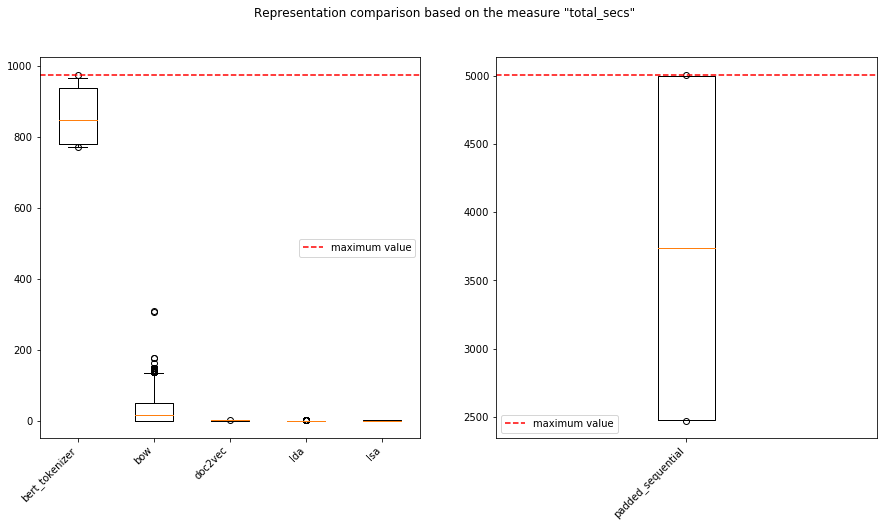

In [20]:
_ = show_time_elapsed(comparison_type="representation")

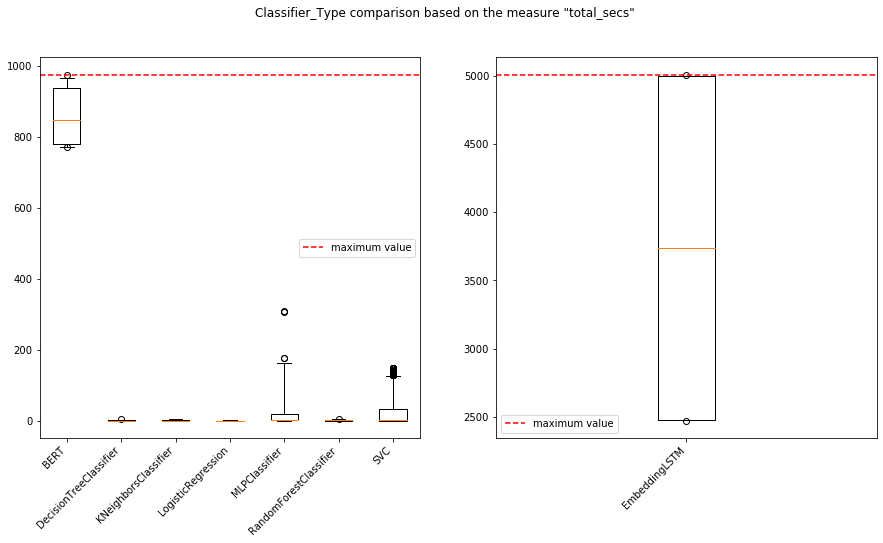

In [21]:
_ = show_time_elapsed(comparison_type="classifier_type")

In [22]:
def show_boxplot(comparison_type="representation", measure="f1"):
    double_graph = False
    if measure in ["precision", "recall", "f1"]:
        double_graph = True

    ncols = 2 if double_graph else 1
    figsize = (15, 7) if double_graph else (7, 7)
    fig, ax = plt.subplots(nrows=1, ncols=ncols, sharey=True, figsize=figsize)
    axes = ax.ravel() if double_graph else [ax]

    groupby_result = list(result_comparison.groupby(by=comparison_type)[measure])
    data = []
    max_values = []
    labels = []
    for grouped_series in groupby_result:
        label = grouped_series[0]
        np_series = grouped_series[1].to_numpy()
        labels.append(label)
        data.append(np_series)

    axes[0].set_title(
        f'{comparison_type.title()} comparison based on the measure "{measure}"'
    )
    whis = [2, 98]
    axes[0].boxplot(data, whis=whis, labels=labels)
    for label in axes[0].get_xticklabels():
        label.set_rotation(45)
        label.set_ha("right")

    max_values = [serie.max() for serie in data]
    max_value = max(max_values)
    xmin, xmax = 0, 1
    axes[0].axhline(
        y=max_value,
        color="r",
        linestyle="--",
        xmin=xmin,
        xmax=xmax,
        label="maximum value",
    )
    axes[0].legend()

    if double_graph:
        second_measure = "positive_" + measure
        groupby_result = list(
            result_comparison.groupby(by=comparison_type)[second_measure]
        )
        data = []
        max_values = []
        labels = []
        for grouped_series in groupby_result:
            label = grouped_series[0]
            np_series = grouped_series[1].to_numpy()
            labels.append(label)
            data.append(np_series)

        axes[1].set_title(
            f'{comparison_type.title()} comparison based on the measure "{second_measure}"'
        )
        axes[1].boxplot(data, whis=whis, labels=labels)
        for label in axes[1].get_xticklabels():
            label.set_rotation(45)
            label.set_ha("right")

        max_values = [serie.max() for serie in data]
        max_value = max(max_values)
        axes[1].axhline(
            y=max_value,
            color="r",
            linestyle="--",
            xmin=xmin,
            xmax=xmax,
            label="maximum value",
        )
        axes[1].legend()

    return fig

In [23]:
PATH_TO_REPORT_FIGURES = os.path.join(
    PATH_REPORTS, corpus_kind, corpus_name, "01_atemporal_classification/figures"
)
os.makedirs(PATH_TO_REPORT_FIGURES, exist_ok=True)
fig_dip = 300

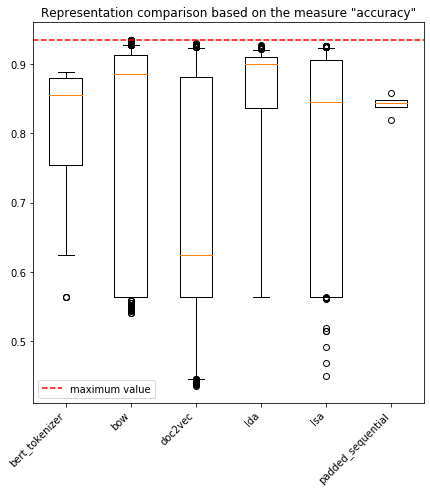

In [24]:
figure = show_boxplot(comparison_type="representation", measure="accuracy")

file_name = "01_all_experiments_accuracy_representation.png"
file_path = os.path.join(PATH_TO_REPORT_FIGURES, file_name)
figure.savefig(fname=file_path, dpi=fig_dip)

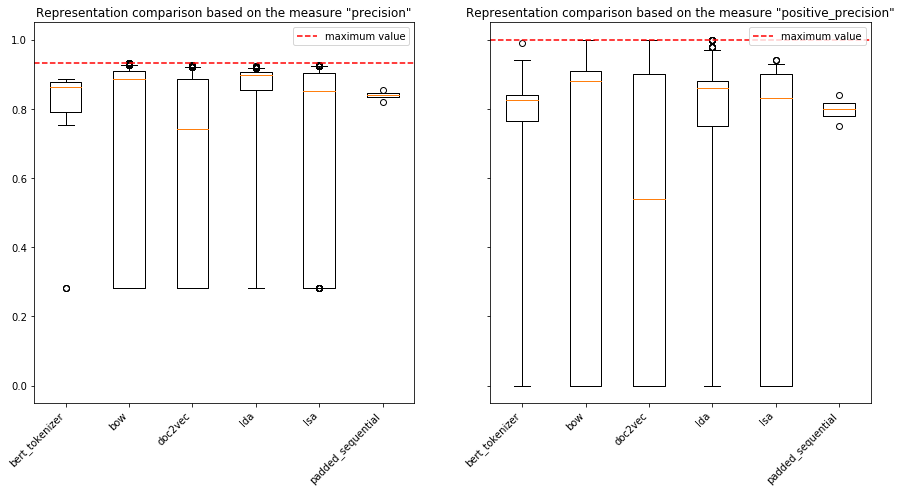

In [25]:
figure = show_boxplot(comparison_type="representation", measure="precision")

file_name = "02_all_experiments_precision_representation.png"
file_path = os.path.join(PATH_TO_REPORT_FIGURES, file_name)
figure.savefig(fname=file_path, dpi=fig_dip)

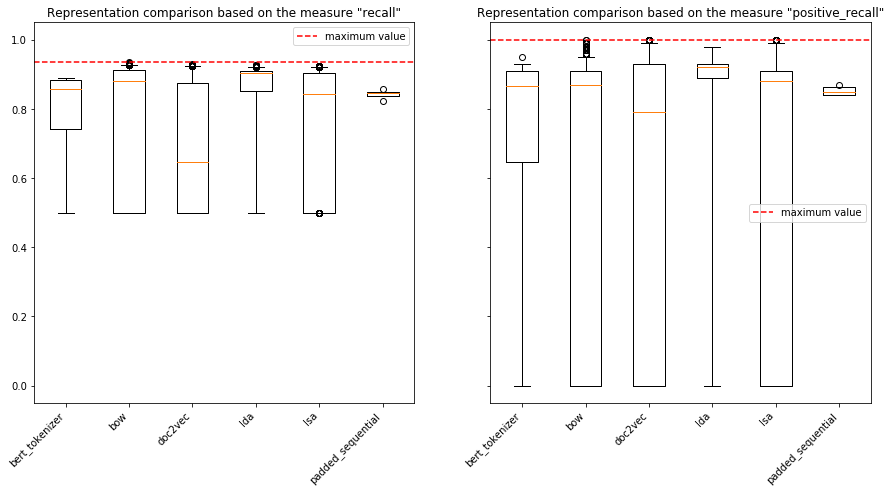

In [26]:
figure = show_boxplot(comparison_type="representation", measure="recall")

file_name = "03_all_experiments_recall_representation.png"
file_path = os.path.join(PATH_TO_REPORT_FIGURES, file_name)
figure.savefig(fname=file_path, dpi=fig_dip)

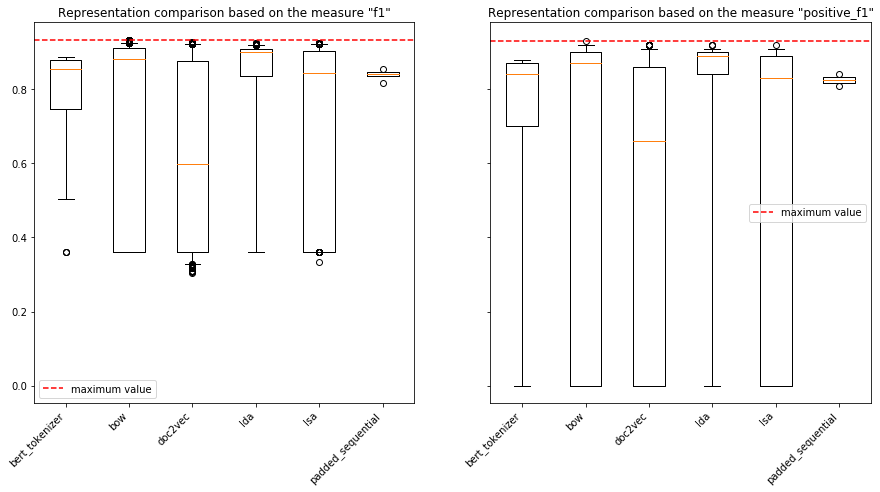

In [27]:
figure = show_boxplot(comparison_type="representation", measure="f1")

file_name = "04_all_experiments_f1_representation.png"
file_path = os.path.join(PATH_TO_REPORT_FIGURES, file_name)
figure.savefig(fname=file_path, dpi=fig_dip)

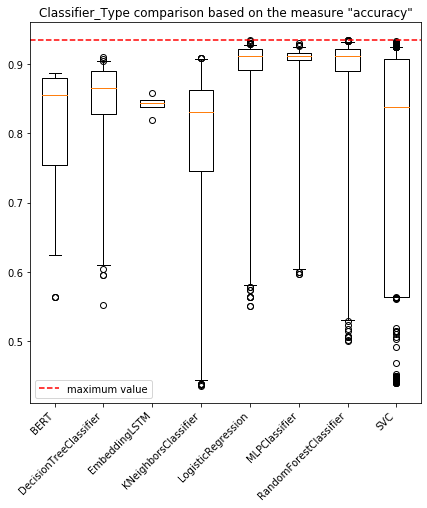

In [28]:
figure = show_boxplot(comparison_type="classifier_type", measure="accuracy")

file_name = "05_all_experiments_accuracy_classifier_type.png"
file_path = os.path.join(PATH_TO_REPORT_FIGURES, file_name)
figure.savefig(fname=file_path, dpi=fig_dip)

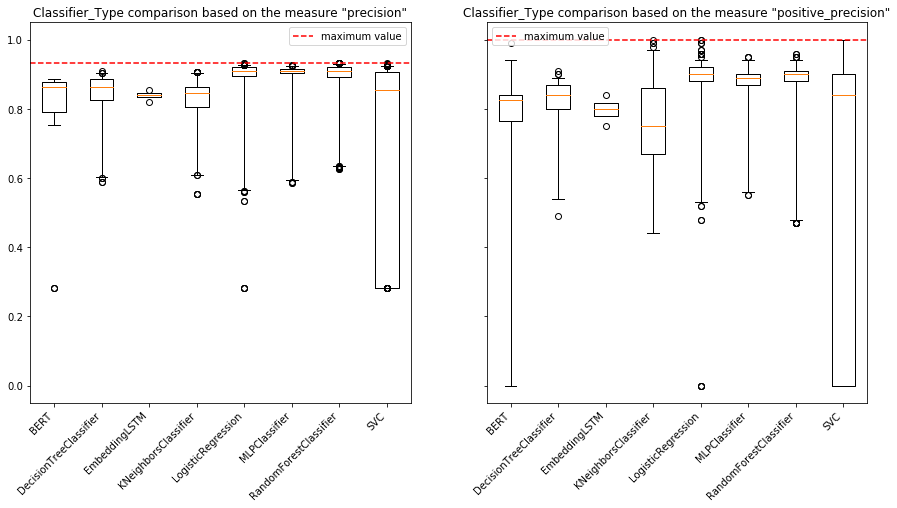

In [29]:
figure = show_boxplot(comparison_type="classifier_type", measure="precision")

file_name = "06_all_experiments_precision_classifier_type.png"
file_path = os.path.join(PATH_TO_REPORT_FIGURES, file_name)
figure.savefig(fname=file_path, dpi=fig_dip)

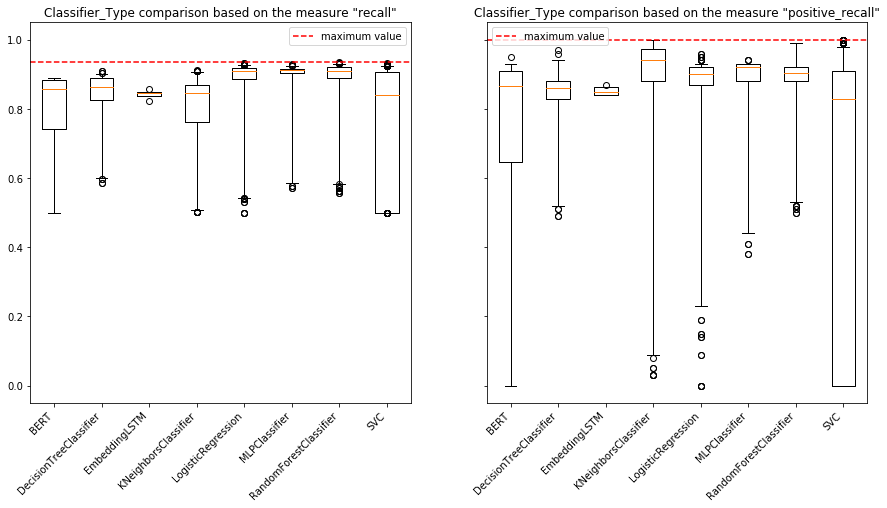

In [30]:
figure = show_boxplot(comparison_type="classifier_type", measure="recall")

file_name = "07_all_experiments_recall_classifier_type.png"
file_path = os.path.join(PATH_TO_REPORT_FIGURES, file_name)
figure.savefig(fname=file_path, dpi=fig_dip)

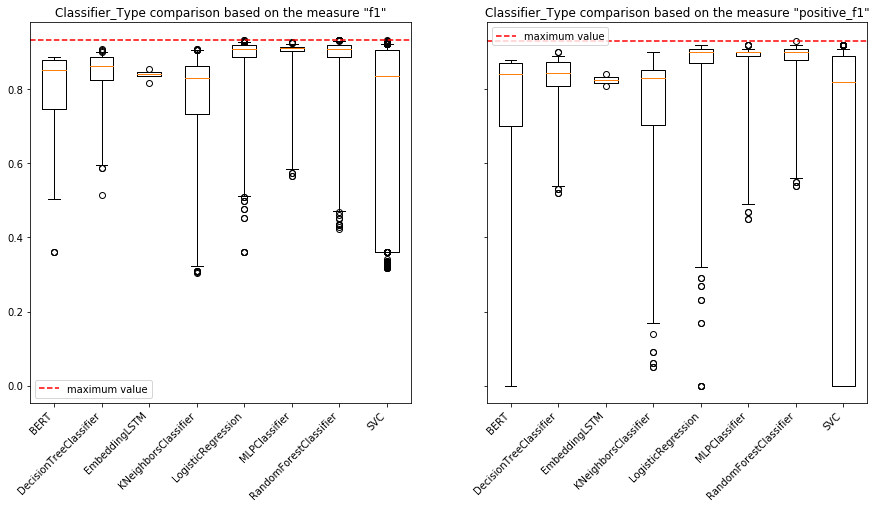

In [31]:
figure = show_boxplot(comparison_type="classifier_type", measure="f1")

file_name = "08_all_experiments_f1_classifier_type.png"
file_path = os.path.join(PATH_TO_REPORT_FIGURES, file_name)
figure.savefig(fname=file_path, dpi=fig_dip)

In [32]:
def show_matrix_max_values(measure="f1"):
    double_graph = False
    if measure in ["precision", "recall", "f1"]:
        double_graph = True

    ncols = 2 if double_graph else 1
    figsize = (15, 7) if double_graph else (7, 7)
    fig, ax = plt.subplots(nrows=1, ncols=ncols, figsize=figsize)
    axes = ax.ravel() if double_graph else [ax]

    groupby_result = list(
        result_comparison.groupby(by=["representation", "classifier_type"])[measure]
    )
    list_representation = []
    list_classifier_type = []
    list_max_value = []
    for grouped_series in groupby_result:
        representation = grouped_series[0][0]
        classifier_type = grouped_series[0][1]
        max_value = grouped_series[1].to_numpy().max()

        list_representation.append(representation)
        list_classifier_type.append(classifier_type)
        list_max_value.append(max_value)

    data = {
        "representation": list_representation,
        "classifier_type": list_classifier_type,
        "max_value": list_max_value,
    }
    df = pd.DataFrame(data=data)
    df = df.pivot("representation", "classifier_type", "max_value")
    sns.heatmap(df, ax=axes[0], annot=True, fmt=".2f", vmin=0, vmax=1, cmap="RdYlGn")

    axes[0].set_title(f'Maximum values for the measure "{measure}"')

    if double_graph:
        second_measure = "positive_" + measure
        groupby_result = list(
            result_comparison.groupby(by=["representation", "classifier_type"])[measure]
        )
        list_representation = []
        list_classifier_type = []
        list_max_value = []
        for grouped_series in groupby_result:
            representation = grouped_series[0][0]
            classifier_type = grouped_series[0][1]
            max_value = grouped_series[1].to_numpy().max()

            list_representation.append(representation)
            list_classifier_type.append(classifier_type)
            list_max_value.append(max_value)

        data = {
            "representation": list_representation,
            "classifier_type": list_classifier_type,
            "max_value": list_max_value,
        }
        df = pd.DataFrame(data=data)
        df = df.pivot("representation", "classifier_type", "max_value")
        sns.heatmap(
            df, ax=axes[1], annot=True, fmt=".2f", vmin=0, vmax=1, cmap="RdYlGn"
        )

        axes[1].set_title(f'Maximum values for the measure "{second_measure}"')

    return fig

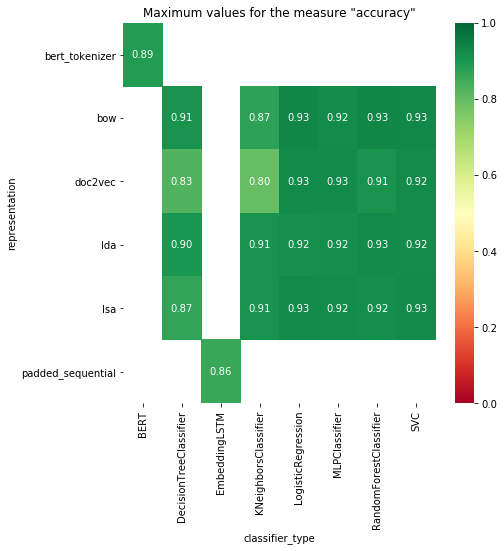

In [33]:
_ = show_matrix_max_values(measure="accuracy")

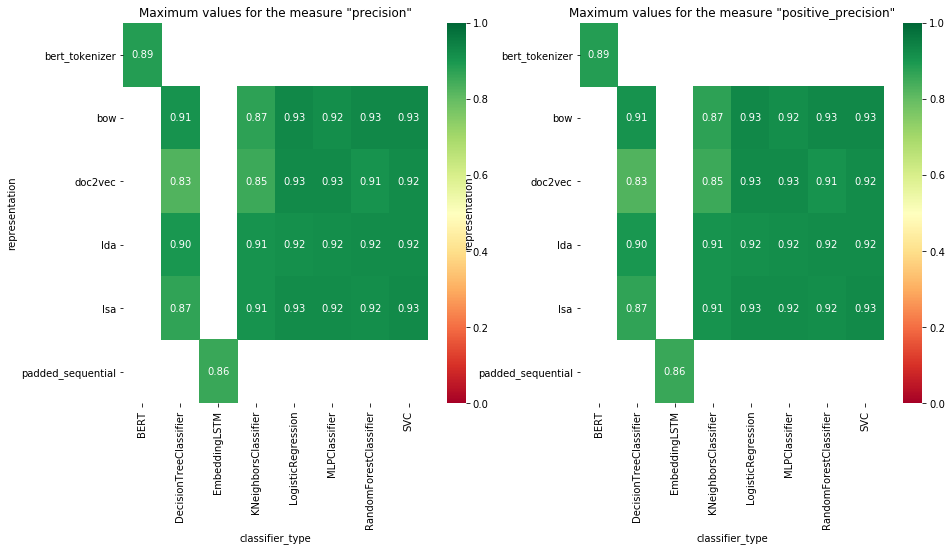

In [34]:
_ = show_matrix_max_values(measure="precision")

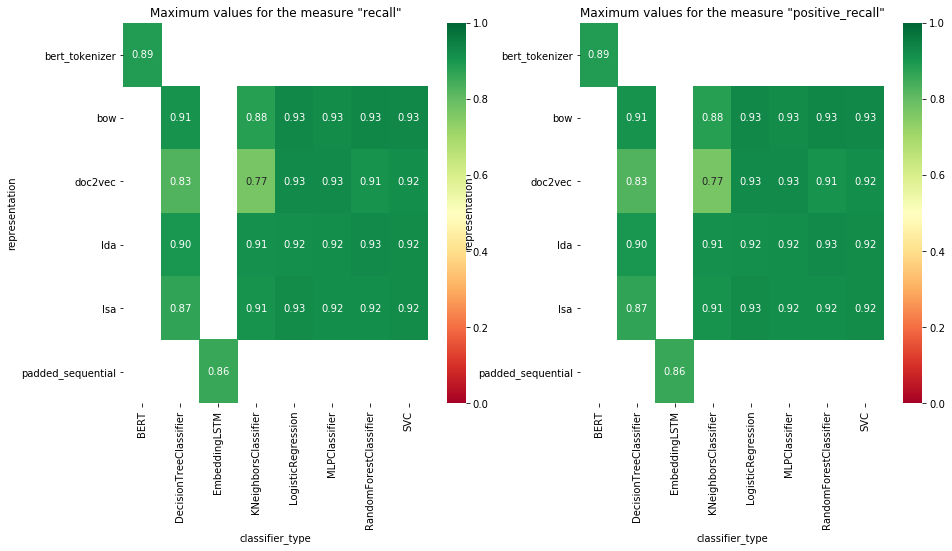

In [35]:
_ = show_matrix_max_values(measure="recall")

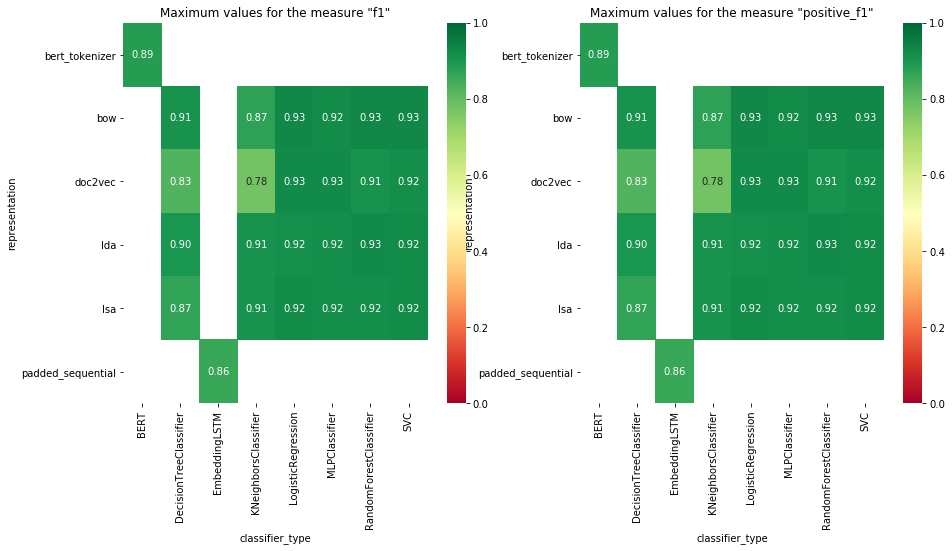

In [36]:
figure = show_matrix_max_values(measure="f1")

file_name = "09_all_experiments_f1_max_values.png"
file_path = os.path.join(PATH_TO_REPORT_FIGURES, file_name)
figure.savefig(fname=file_path, dpi=fig_dip)